In [1]:
# Load necessary libraries
library(dplyr)
library(ggplot2)
library(cluster)
library(factoextra)

# Load the dataset
data <- read.csv("/Users/anika/Library/CloudStorage/OneDrive-reutlingen-university.de/Dokumente/Uni/DCU/7. Semester/Data Analytics/Business Portfolio/Shopping Mall Customer Segmentation Data .csv")




Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [2]:
# Data Exploration and Preprocessing
## Inspecting the structure
str(data)

'data.frame':	15079 obs. of  5 variables:
 $ Customer.ID   : chr  "d410ea53-6661-42a9-ad3a-f554b05fd2a7" "1770b26f-493f-46b6-837f-4237fb5a314e" "e81aa8eb-1767-4b77-87ce-1620dc732c5e" "9795712a-ad19-47bf-8886-4f997d6046e3" ...
 $ Age           : int  30 58 62 23 24 42 27 24 83 62 ...
 $ Gender        : chr  "Male" "Female" "Female" "Male" ...
 $ Annual.Income : int  151479 185088 70912 55460 153752 158335 163501 70476 47743 63448 ...
 $ Spending.Score: int  89 95 76 57 76 40 37 17 34 3 ...


In [3]:
## Checking for missing values
sum(is.na(data))

[1] 0

In [4]:
## Summarizing the data
summary(data)

 Customer.ID             Age           Gender          Annual.Income   
 Length:15079       Min.   :18.00   Length:15079       Min.   : 20022  
 Class :character   1st Qu.:36.00   Class :character   1st Qu.: 64141  
 Mode  :character   Median :54.00   Mode  :character   Median :109190  
                    Mean   :54.19                      Mean   :109743  
                    3rd Qu.:72.00                      3rd Qu.:155008  
                    Max.   :90.00                      Max.   :199974  
 Spending.Score  
 Min.   :  1.00  
 1st Qu.: 26.00  
 Median : 51.00  
 Mean   : 50.59  
 3rd Qu.: 75.00  
 Max.   :100.00  

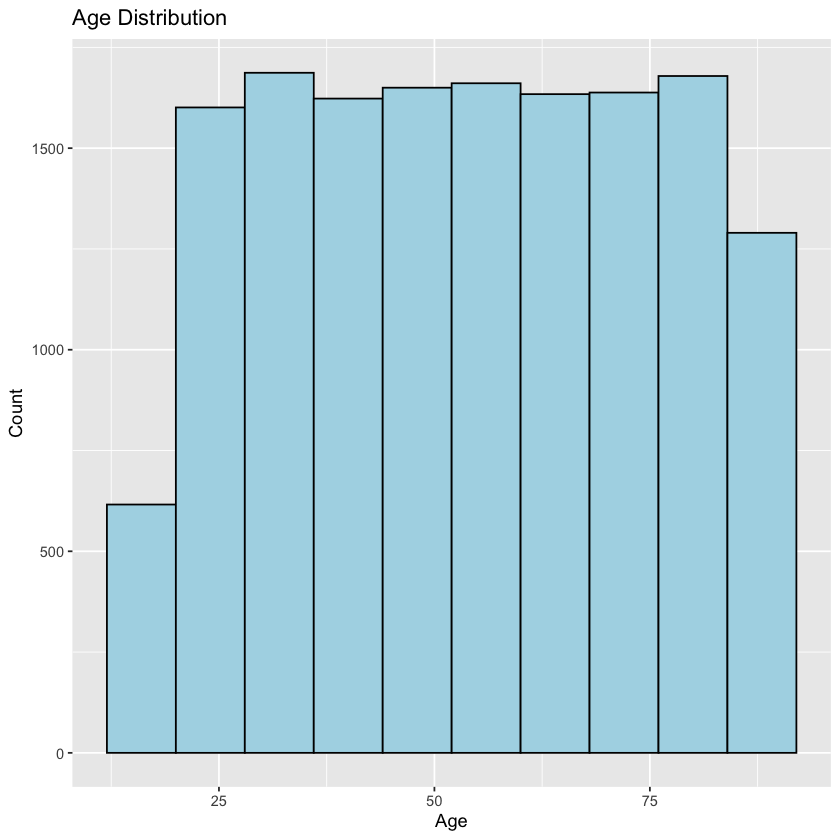

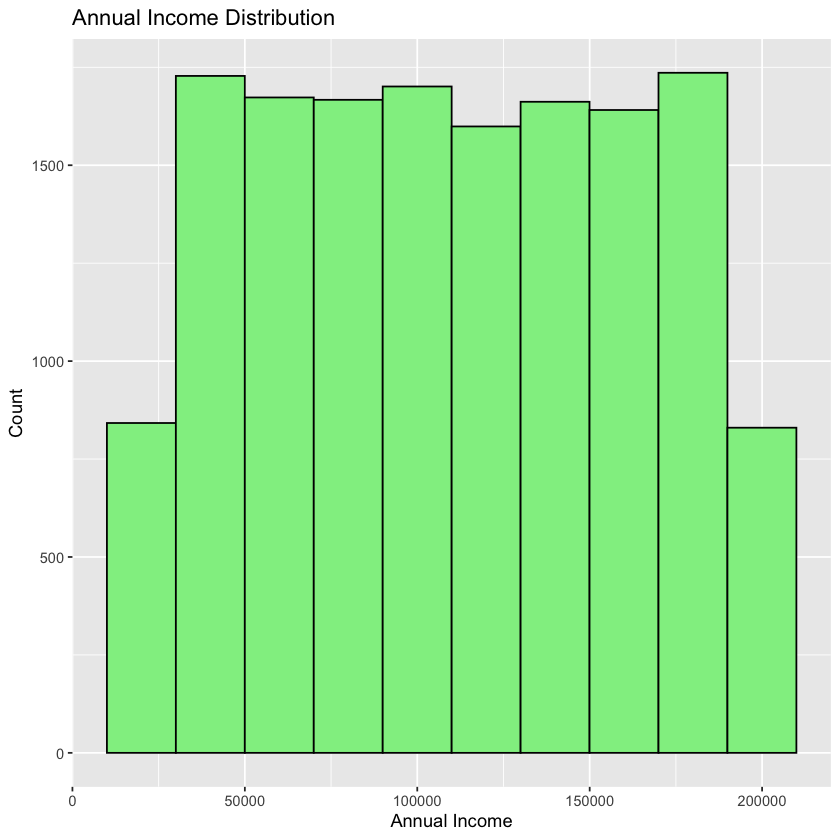

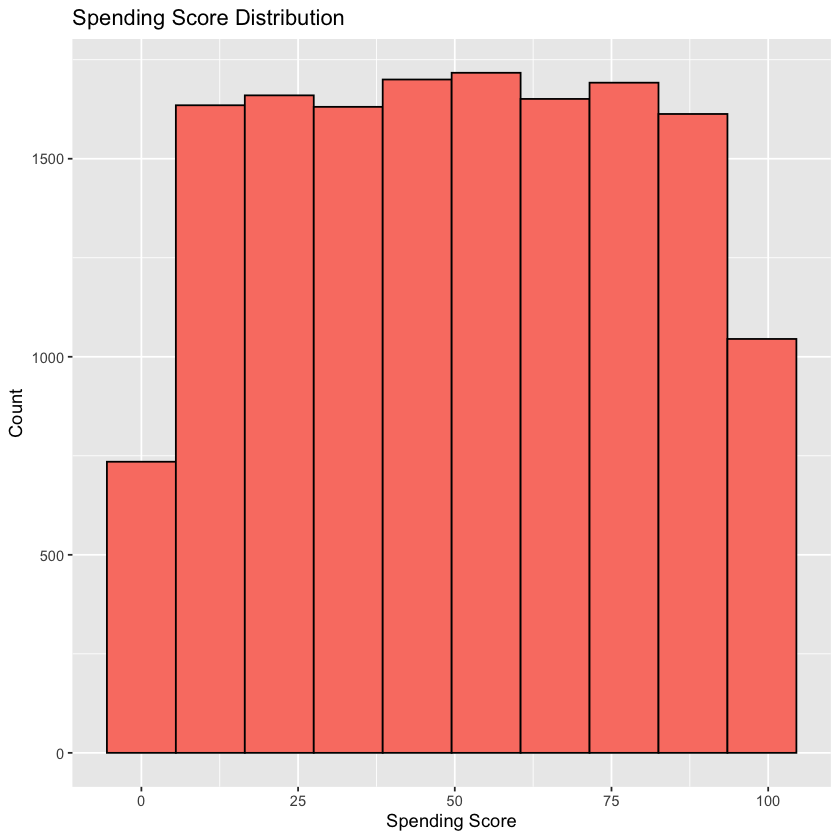

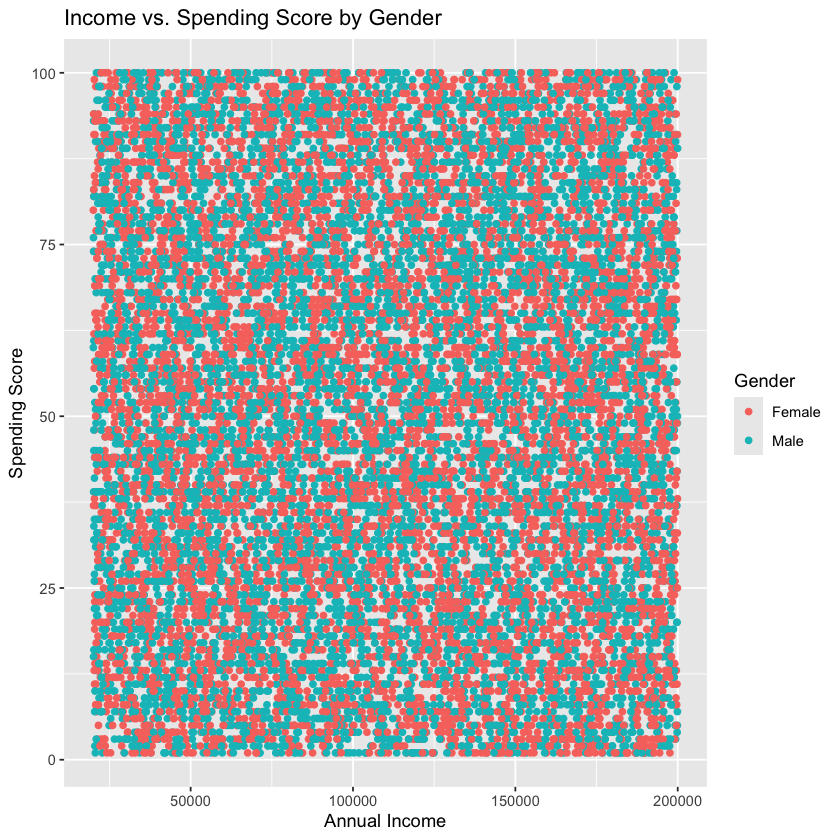

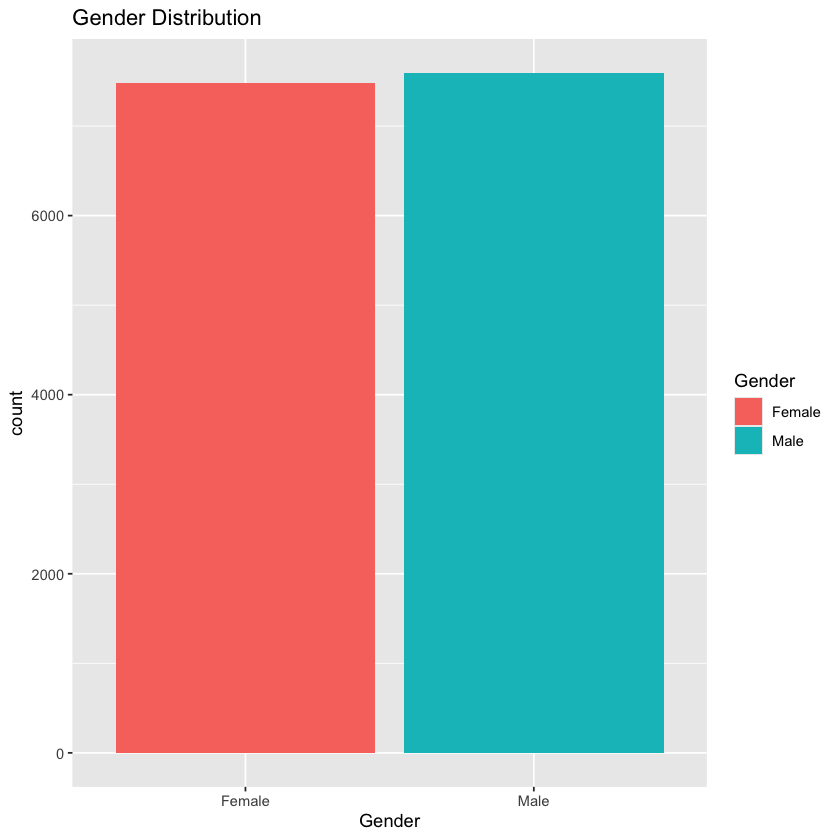

In [5]:
# Data Visualization
## Histograms for Age, Income, and Spending Score
ggplot(data, aes(x = Age)) + geom_histogram(bins = 10, fill = "lightblue", color = "black") +
  ggtitle("Age Distribution") + xlab("Age") + ylab("Count")

ggplot(data, aes(x = Annual.Income)) + geom_histogram(bins = 10, fill = "lightgreen", color = "black") +
  ggtitle("Annual Income Distribution") + xlab("Annual Income") + ylab("Count")

ggplot(data, aes(x = Spending.Score)) + geom_histogram(bins = 10, fill = "salmon", color = "black") +
  ggtitle("Spending Score Distribution") + xlab("Spending Score") + ylab("Count")

## Scatter plot for Income vs Spending Score
ggplot(data, aes(x = Annual.Income, y = Spending.Score)) +
  geom_point(aes(color = Gender)) + ggtitle("Income vs. Spending Score by Gender") +
  xlab("Annual Income") + ylab("Spending Score")

## Gender-based comparisons using bar plots
ggplot(data, aes(x = Gender, fill = Gender)) + geom_bar() +
  ggtitle("Gender Distribution")

Warning message:
“keine Konvergenz nach 10 Schritten”
Warning message:
“keine Konvergenz nach 10 Schritten”


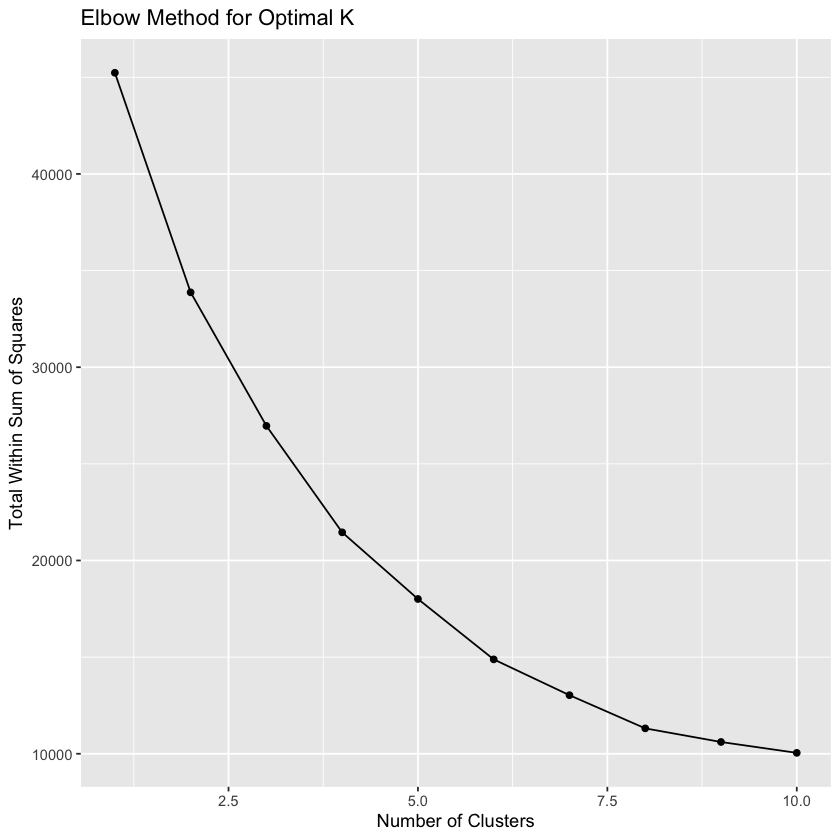

In [6]:
# Customer Segmentation Analysis
## Selecting data for clustering
data_cluster <- data %>% select(Age, Annual.Income, Spending.Score)
data_cluster <- scale(data_cluster)  # Scaling the data

## Determining the optimal number of clusters
set.seed(123)
wss <- sapply(1:10, function(k){kmeans(data_cluster, k, nstart = 10)$tot.withinss})
elbow_plot <- data.frame(k = 1:10, wss = wss)
ggplot(elbow_plot, aes(x = k, y = wss)) + geom_point() + geom_line() +
  ggtitle("Elbow Method for Optimal K") + xlab("Number of Clusters") + ylab("Total Within Sum of Squares")

## K-means clustering
set.seed(123)
k <- kmeans(data_cluster, 4, nstart = 10)  # Assuming 4 clusters from the elbow plot
data$Cluster <- as.factor(k$cluster)

## Analyzing and describing cluster characteristics
cluster_summary <- data %>% group_by(Cluster) %>% summarise(
  Avg.Age = mean(Age),
  Avg.Income = mean(Annual.Income),
  Avg.Spending = mean(Spending.Score),
  Count = n()
)

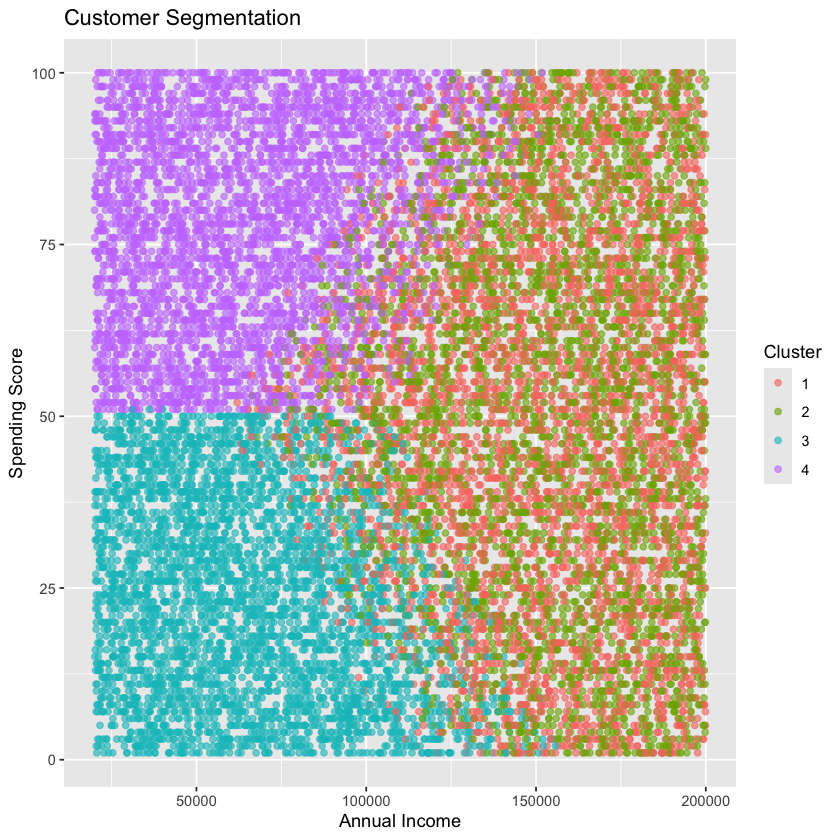

In [10]:
# Interpretation and Reporting
## Visualization of clusters
ggplot(data, aes(x = Annual.Income, y = Spending.Score, color = Cluster)) +
  geom_point(alpha = 0.6) + ggtitle("Customer Segmentation") +
  xlab("Annual Income") + ylab("Spending Score")

In [11]:
# Actionable Insights and Recommendations
## Evaluate cluster summaries for marketing strategies
print(cluster_summary)

# A tibble: 4 × 5
  Cluster Avg.Age Avg.Income Avg.Spending Count
  <fct>     <dbl>      <dbl>        <dbl> <int>
1 1          74.4    150788.         49.8  3902
2 2          34.2    153541.         51.5  3724
3 3          53.4     66124.         23.4  3745
4 4          53.8     66618.         77.9  3708


In [12]:
## Developing strategies based on clusters
if(exists("cluster_summary")) {
  if(nrow(cluster_summary) > 0) {
    cat("Recommendations based on Clusters:\n")
    for(i in 1:nrow(cluster_summary)) {
      cat(sprintf("Cluster %d: Target customers aged ~%.1f with average income $%.2f and spending score %.1f. \n",
                  i, cluster_summary$Avg.Age[i], cluster_summary$Avg.Income[i], cluster_summary$Avg.Spending[i]))
      if(cluster_summary$Avg.Spending[i] > 70) {
        cat("Focus on high-value promotions and loyalty programs.\n\n")
      } else if(cluster_summary$Avg.Spending[i] > 50) {
        cat("Moderate spenders: Offer bundled promotions to increase spending.\n\n")
      } else {
        cat("Lower spenders: Engage with personalized offers to enhance brand loyalty.\n\n")
      }
    }
  }
}

Recommendations based on Clusters:
Cluster 1: Target customers aged ~74.4 with average income $150787.91 and spending score 49.8. 
Lower spenders: Engage with personalized offers to enhance brand loyalty.

Cluster 2: Target customers aged ~34.2 with average income $153540.95 and spending score 51.5. 
Moderate spenders: Offer bundled promotions to increase spending.

Cluster 3: Target customers aged ~53.4 with average income $66123.77 and spending score 23.4. 
Lower spenders: Engage with personalized offers to enhance brand loyalty.

Cluster 4: Target customers aged ~53.8 with average income $66617.70 and spending score 77.9. 
Focus on high-value promotions and loyalty programs.

